## Dataset 2



### pertanyaan
- Top 5 Stand dengan power Terkuat.
- Apakah besarnya Power dapat mempengaruhi Stats?
- Berapa jumlah rata-rata total stats stand yang berada di arc story Stardust Crusader dengan arc Diamon unbreakable ?
- Apakah total Stats dapat dipengaruhi oleh Development stand?
- Tampilkan stand yang termasuk grup stardust crusader serta berapakah stats keseluruhan stand.

In [1]:
!kaggle datasets download -d shilongzhuang/all-stands-in-jojo-bizarre-adventure-with-stats

401 - Unauthorized


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('JoJo_Bizarre_Adventure_All_Stands_Stats.csv')
df

,Stand,PWR,SPD,RNG,STA,PRC,DEV,Story
0,Anubis,B,B,E,A,E,C,Part 3: Stardust Crusaders
1,Atum,D,C,D,B,D,D,Part 3: Stardust Crusaders
2,Bastet,E,E,B,A,E,E,Part 3: Stardust Crusaders
3,Cream,B,B,D,C,C,D,Part 3: Stardust Crusaders
4,Death Thirteen,C,C,E,B,D,B,Part 3: Stardust Crusaders
...,...,...,...,...,...,...,...,...
151,Nightbird Flying,E,A,A,A,E,E,Light Novel: Purple Haze Feedback
152,Purple Haze Distortion,A,B,E,E,C,unknown,Light Novel: Purple Haze Feedback
153,Rainy Day Dream Away,E,B,A,A,E,E,Light Novel: Purple Haze Feedback
154,Remote Romance,E,D,infinite,B,C,E,Featured


In [3]:
df.head()

,Stand,PWR,SPD,RNG,STA,PRC,DEV,Story
0,Anubis,B,B,E,A,E,C,Part 3: Stardust Crusaders
1,Atum,D,C,D,B,D,D,Part 3: Stardust Crusaders
2,Bastet,E,E,B,A,E,E,Part 3: Stardust Crusaders
3,Cream,B,B,D,C,C,D,Part 3: Stardust Crusaders
4,Death Thirteen,C,C,E,B,D,B,Part 3: Stardust Crusaders


In [4]:
df.rename(lambda x: x.lower(), axis='columns', inplace=True)

In [5]:
# row_labels = {'pwr':'Power',
#              'spd':'Speed',
#              'rng':'Range',
#              'sta':'Stamina',
#              'prc':'Precision',
#              'dev':'Development'}

# df.rename(index= row_labels, inplace=True)
# df

In [6]:
for stats in ['pwr', 'spd', 'rng', 'sta', 'prc', 'dev']:
    df[stats] = df[stats].map({'A':5, 'B':4, 'C':3, 'D':2, 'E':1, 'undefined':0, 'none':0, 'infinite': 6,
                         'unknown': np.nan, 'situational': np.nan
                        })

In [7]:
df.dropna(inplace = True)

In [8]:
df.shape

(150, 8)

In [9]:
df.isnull().sum()

stand    0
pwr      0
spd      0
rng      0
sta      0
prc      0
dev      0
story    0
dtype: int64

In [10]:
df.sample(10)

,stand,pwr,spd,rng,sta,prc,dev,story
69,The Grateful Dead,4.0,1.0,4.0,5.0,1.0,3.0,Part 5: Vento Aureo
56,The Hand,4.0,4.0,2.0,3.0,3.0,3.0,Part 4: Diamond is Unbreakable
73,Baby Face (GoGo),5.0,4.0,5.0,5.0,3.0,3.0,Part 5: Vento Aureo
60,Stray Cat,4.0,1.0,0.0,5.0,1.0,3.0,Part 4: Diamond is Unbreakable
67,Moody Blues,3.0,3.0,5.0,5.0,3.0,3.0,Part 5: Vento Aureo
57,Echoes (ACT1),1.0,1.0,4.0,4.0,3.0,5.0,Part 4: Diamond is Unbreakable
141,California King Bed,0.0,0.0,1.0,4.0,1.0,1.0,Part 8: JoJolion
117,Ball Breaker,5.0,5.0,2.0,4.0,3.0,4.0,Part 7: Steel Ball Run
81,Little Feet,2.0,4.0,1.0,5.0,2.0,3.0,Part 5: Vento Aureo
97,Star Platinum,5.0,5.0,3.0,5.0,5.0,0.0,Part 6: Stone Ocean


## Penambahan data untuk mengukur stat keseluruhan

| Stat | Weight | Description |
|---------|:-------------|:--------------|
| DEV | 25% | mengukur fungsi kemampuan stand dan power, dan kapasitas untuk meningkatkan kemampuannya secara keseluruhan.|
| RNG | 20% | Mengukur rentang pengaruh kemampuan, dan mobilitas. |
| SPD | 15% | Mengukur kelincahan dan refleks Stand serta kecepatan stand |
| PWR | 15% | Mengukur kekuatan dan kemampuan Stand untuk menyebabkan kerusakan (cedera fisik atau kerusakan lingkungan) dalam jangka waktu tertentu. |
| PRC | 15% | Mengukur akurasi Stand dan rentang pengaruh/efek kemampuan mereka terhadap target yang ditentukan. |
| STA | 10% | Mengukur durasi waktu stand dapat secara aktif mempertahankan kemampuannya. |

In [11]:
import matplotlib.colors

df['stats'] = .25*df['dev'] + .2*df['rng'] + .15*df['spd'] + .15*df['pwr'] + .15*df['prc'] + .1*df['sta'] 
df['stats'] = df['stats'].round(2)
df[['pwr', 'spd', 'rng', 'sta', 'prc', 'dev']] = df[['pwr', 'spd', 'rng', 'sta', 'prc', 'dev']].astype(int)
df.sort_values(by = 'stats', ascending = False, inplace = True)
pd.set_option('display.max_rows', None)

df.loc[(df['stats'] >= 0) & (df['stats'] < 2), 'label'] = 'Weak'
df.loc[(df['stats'] >= 2) & (df['stats'] < 3), 'label'] = 'Average' 
df.loc[(df['stats'] >= 3) & (df['stats'] < 4), 'label'] = 'Strong' 
df.loc[(df['stats'] >= 4), 'label'] = 'Insanely Strong' 

# Given the total_stats computed, Stands will be classified accordingly as Poor (1-2), 
# Below Average (2-3), Average (3-4), Very Good (>=4).

# Jo = df.groupby(['story', 'label']).size().reset_index()
# Jo.rename(columns = {0: 'count'}, inplace = True)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",
                                                               ['#ECB390',
                                                                '#FCF8E8',
                                                                '#94B49F',
                                                               ])
df.style.background_gradient(cmap = cmap, vmin = 0, vmax = 6, subset = ['stats', 'pwr', 'spd', 'rng', 'sta', 'prc', 'dev'])
# print(df)

,stand,pwr,spd,rng,sta,prc,dev,story,stats,label
77,Gold Experience Requiem,6,6,6,6,6,6,Part 5: Vento Aureo,6.000000,Insanely Strong
83,Notorious B.I.G,5,6,6,6,1,5,Part 5: Vento Aureo,4.850000,Insanely Strong
106,Kiss,5,5,5,5,3,5,Part 6: Stone Ocean,4.700000,Insanely Strong
52,Red Hot Chili Pepper,5,5,5,5,3,5,Part 4: Diamond is Unbreakable,4.700000,Insanely Strong
25,Star Platinum,5,5,3,5,5,5,Part 3: Stardust Crusaders,4.600000,Insanely Strong
123,Dirty Deeds Done Dirt Cheap,5,5,3,5,5,5,Part 7: Steel Ball Run,4.600000,Insanely Strong
109,Made in Heaven,4,6,3,5,3,5,Part 6: Stone Ocean,4.300000,Insanely Strong
48,Bites the Dust,4,4,5,5,2,5,Part 4: Diamond is Unbreakable,4.250000,Insanely Strong
29,The World,5,5,3,5,4,4,Part 3: Stardust Crusaders,4.200000,Insanely Strong
93,Stone Free,5,4,3,5,3,5,Part 6: Stone Ocean,4.150000,Insanely Strong


### Nomor 1

In [12]:
# display(df.nlargest(5, 'pwr') [['stand','pwr']])
display(df.nlargest(5, ['pwr', 'stats']) [['stand','pwr','stats']])

,stand,pwr,stats
77,Gold Experience Requiem,6,6.00
83,Notorious B.I.G,5,4.85
106,Kiss,5,4.70
52,Red Hot Chili Pepper,5,4.70
25,Star Platinum,5,4.60


> Gold Experience Requiem

![](https://c.tenor.com/AfL8C420OW0AAAAC/jojo-golden-experience.gif)

> Notorious B.I.G

![](https://i.kym-cdn.com/photos/images/original/001/478/658/078.gif)

> Kiss

<img src="https://i.pinimg.com/originals/49/16/ec/4916eccacef664b5ee67591281657583.jpg"  width="400" 
     height="500" />
<!-- ![](https://i.kym-cdn.com/photos/images/original/001/113/004/bba.gif) -->

> Red Hot Chili Pepper

![](https://i.kym-cdn.com/photos/images/original/001/113/004/bba.gif)

> Star Platinum

![](https://c.tenor.com/CG1nFgUpKwAAAAAC/jojo-jotaro-kujo.gif)

### Nomor 2

In [13]:
df[['pwr', 'stats']].corr()

,pwr,stats
pwr,1.000000,0.710956
stats,0.710956,1.000000


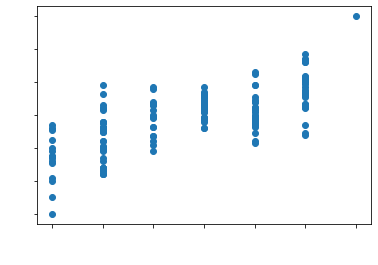

In [14]:
plt.scatter(df['pwr'],df['stats'])
plt.xlabel('Power',color='w')
plt.ylabel('Stats', color='w')
plt.xticks(fontsize=13,color='w')
plt.yticks(fontsize=13,color='w')
plt.show()

In [15]:
from scipy.stats import pearsonr
pKoef, pVal = pearsonr(df['pwr'],df['stats'])
print(' koefiesien korelasi person : ', pKoef,  'P-Value= ', pVal)

 koefiesien korelasi person :  0.710955901346872 P-Value=  2.150109496494432e-24


- nilai korelasi mendekati angka satu itu berarti nilai total korelasi linear positif, tetapi P-value yang dihasilkan lebih dari 0.5 yang artinya tidak ada bukti korelasi signifikan antara power dengan stats

## Nomor 3

In [16]:
p3 = df[df.story.str.contains('Stardust')]
p4 = df[df.story.str.contains('Diamond')]
# display(df[['stand', 'prc']][df.prc > 3])
# dt = df[['stand', 'prc']][df.prc > 3]
# dt.value_counts().sum()
# display(p3)
sp3 = p3.value_counts().sum().mean()
sp4 = p4.value_counts().sum().mean()
# display(p4)
print("Star Platinum arc :", sp3,", Diaomnd Unbreakable : ", sp4)

Star Platinum arc : 33.0 , Diaomnd Unbreakable :  28.0


## Nomor 4

In [17]:
df[['stats', 'dev']].corr()

,stats,dev
stats,1.000000,0.719575
dev,0.719575,1.000000


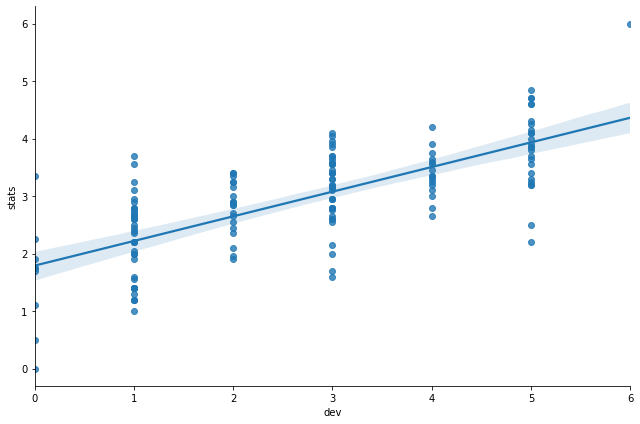

In [18]:
kor = sns.lmplot(data = df, x="dev", y="stats", height=6, aspect=1.5, fit_reg=True)

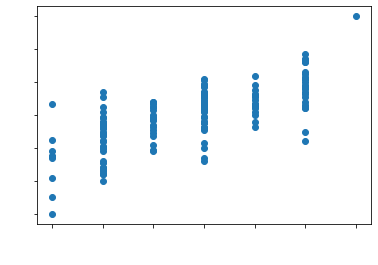

In [19]:
plt.scatter(df['dev'],df['stats'])
plt.xlabel('Develop',color='w')
plt.ylabel('Stats', color='w')
plt.xticks(fontsize=13,color='w')
plt.yticks(fontsize=13,color='w')
plt.show()

In [20]:
from scipy.stats import pearsonr
pKoef, pVal = pearsonr(df['dev'],df['stats'])
print(' koefiesien korelasi person : ', pKoef,  'P-Value= ', pVal)

 koefiesien korelasi person :  0.7195751729185818 P-Value=  3.280405096211797e-25


- nilai korelasi mendekati angka satu itu berarti nilai total korelasi linear positif, tetapi P-value yang dihasilkan lebih dari 0.5 yang artinya tidak ada bukti korelasi signifikan antara development dengan stats

## Nomor 5

In [21]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",
                                                               ['#3D3C42',
                                                                '#CA82FF',
                                                               ])

sc = df[df.stand.str.contains('Star Platinum') |
  df.stand.str.contains('Magician') |
  df.stand.str.contains('Hermit Purple') |
  df.stand.str.contains('Hierophant') |
  df.stand.str.contains('Silver Chariot') |
  df.stand.str.contains('Fool')]

sc.style.background_gradient(cmap = cmap, vmin = 1, vmax = 5, subset = ['pwr', 'spd', 'rng', 'sta', 'prc', 'dev'])\
.bar(subset = ['stats'], vmax = 5, color = '#CA82FF')

,stand,pwr,spd,rng,sta,prc,dev,story,stats,label
25,Star Platinum,5,5,3,5,5,5,Part 3: Stardust Crusaders,4.600000,Insanely Strong
98,Star Platinum: The World,5,5,3,1,5,3,Part 6: Stone Ocean,3.700000,Strong
24,Silver Chariot,3,5,3,4,4,3,Part 3: Stardust Crusaders,3.550000,Strong
20,Hierophant Green,3,4,5,4,3,2,Part 3: Stardust Crusaders,3.400000,Strong
97,Star Platinum,5,5,3,5,5,0,Part 6: Stone Ocean,3.350000,Strong
23,Magician's Red,4,4,3,4,3,2,Part 3: Stardust Crusaders,3.150000,Strong
28,The Fool,4,3,2,3,2,3,Part 3: Stardust Crusaders,2.800000,Average
19,Hermit Purple,2,3,2,5,2,1,Part 3: Stardust Crusaders,2.200000,Average


(array([0., 1., 2., 3., 4., 5.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 1080x1080 with 0 Axes>

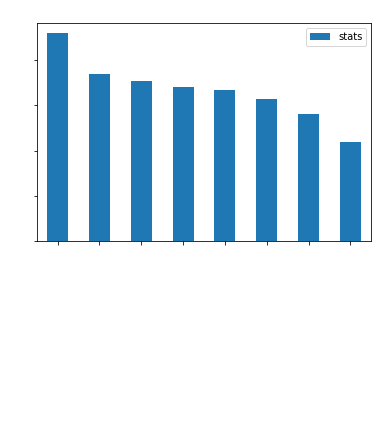

In [22]:
plt.figure(figsize=(15,15))

dfStand = sc[['stand','stats']]
dfStand = dfStand.set_index('stand', drop=True)
dfStand['stats'] = dfStand['stats'].astype('float64')
dfStand.sort_values('stats', ascending=False).plot(kind='bar')

plt.title('Stardust Crusader Group',color = 'w')
plt.ylabel('Stats',color='w')
plt.xlabel('Stand',color='w')

plt.xticks(fontsize=13,color='w')
plt.yticks(fontsize=13,color='w')


In [23]:
# x = np.arange(len(sc)) 
# width = 0.4
# fig,ax = plt.subplots()
# rect1 = ax.bar(x - width/2, sc['stats'], label='stats')

# for bar in ax.patches:
#     value = bar.get_height()
#     text = f'{value}'
#     text_x = bar.get_x() + bar.get_width() / 2
#     text_y = bar.get_y() + value
#     ax.text(text_x, text_y, text, ha='center',color='r',size=12)

In [24]:
df.to_csv (r'C:\Users\ACER\Documents\PythonSekrip\BigData\TUGAS AKHIR\Rio\coba.csv', index = False, header=True)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pydot

In [26]:
Jo = pd.read_csv('coba.csv')
Jo.drop('story',axis=1,inplace=True)
Jo.drop('stand',axis=1,inplace=True)
Jo.drop('stats',axis=1,inplace=True)

Jo.dropna(inplace = True)

Jo.columns = ['pwr', 'spd', 'rng', 'sta', 'prc', 'dev','label']
Jo.isnull().sum()


X = Jo[['pwr', 'spd', 'rng', 'sta', 'prc', 'dev']]
y = Jo['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) 
tree_model = DecisionTreeClassifier(criterion="entropy",min_samples_split=3, max_depth=3) 

tes = tree_model.fit(X_train, y_train)
# X_train.shape
# y_train.shape
#code cell 11
tes.score(X_train,y_train)

0.8111111111111111

In [27]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",
                                                               ['#ECB390',
                                                                '#FCF8E8',
                                                                '#94B49F',
                                                               ])
Jo.style.background_gradient(cmap = cmap, vmin = 0, vmax = 6, subset = ['pwr', 'spd', 'rng', 'sta', 'prc', 'dev'])

,pwr,spd,rng,sta,prc,dev,label
0,6,6,6,6,6,6,Insanely Strong
1,5,6,6,6,1,5,Insanely Strong
2,5,5,5,5,3,5,Insanely Strong
3,5,5,5,5,3,5,Insanely Strong
4,5,5,3,5,5,5,Insanely Strong
5,5,5,3,5,5,5,Insanely Strong
6,4,6,3,5,3,5,Insanely Strong
7,4,4,5,5,2,5,Insanely Strong
8,5,5,3,5,4,4,Insanely Strong
9,5,4,3,5,3,5,Insanely Strong


In [42]:
# from array import *
# X_test = array('i',[])
# k = int(6)
# for i in range(0, k):
#     num = int(input("Masukkan data Ke %d:" % (i + 1)))
#     X_test.append(num)
X_test = np.array([3,4,5,2,5,4])

In [43]:
predict = tree_model.predict([X_test])
print(predict)

['Strong']


In [44]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(
    tree_model,
    out_file = None,
    feature_names = ['pwr', 'spd', 'rng', 'sta', 'prc', 'dev'],
    class_names = ['Insanely Strong', 'Strong', 'Average','weak' ],
    rounded= True,
    filled =True)

graph = graphviz.Source(dot_data)
graph.render("Bambang")

'Bambang.pdf'